# Tidy Data on Python

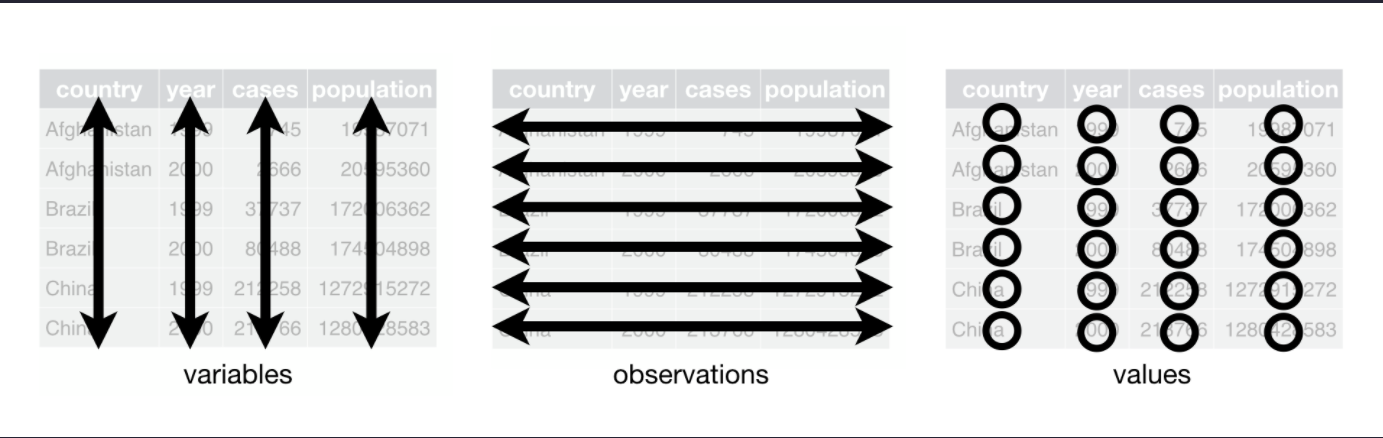

En esta lectura, vamos a conocer un catálogo de funciones y métodos para transformar nuestros datos en caso de que no cumplan ya con los principios de los [datos ordenados](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) o tidy data.

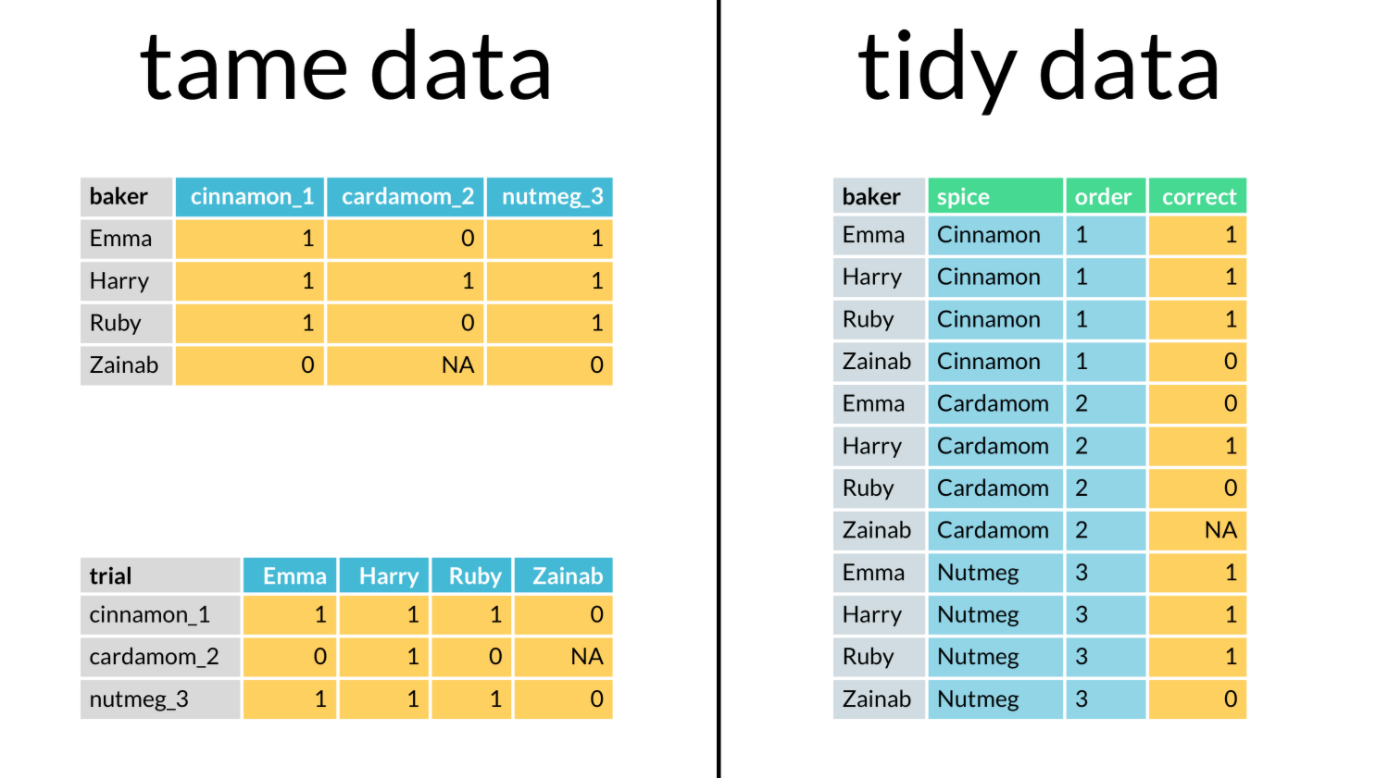

Los principios sobre datos ordenados parecen tan obvios que te podrías preguntar si alguna vez encontrarás un dataset que no esté ordenado. Desafortunadamente, gran parte de los datos que vas a encontrar están desordenados. Existen dos principales razones para esto:
 - La mayoría de las personas no están familiarizadas con los principios de datos ordenados y es difícil derivarlos por cuenta propia a menos que pases mucho tiempo trabajando con datos.
 - Los datos a menudo están organizados para facilitar tareas distintas del análisis. Por ejemplo, los datos se organizan para que su registro sea lo más sencillo posible.

Esto significa que para la mayoría de los análisis necesitarás hacer algún tipo de orden. El primer paso es entender siempre cuáles son las variables y las observaciones. Esto a veces es fácil; otras veces deberás consultar con quienes crearon el dataset. El segundo paso es resolver uno de los siguientes problemas frecuentes:
 - Una variable se extiende por varias columnas
 - Una observación está dispersa entre múltiples filas.
 
> ## Tidy Data is a way of structuring datasets to facilitate analysis.

#### En tidy data:

    1. Cada Variable debe tener su propia columna
    2. Cada Observación debe tener su propia fila
    3. Cada dato debe ser atómico y forma una tabla
    
#### Ejemplos de Datos Desordenados 🤯 🤐

    * Los headers en las columnas son VALORES y no nombres de variables <- muy común
    * Multiples variables guardadas en la misma columna
    * Variables guardadas una parte en columnas otras en filas
    * Los valores no són atómicos 

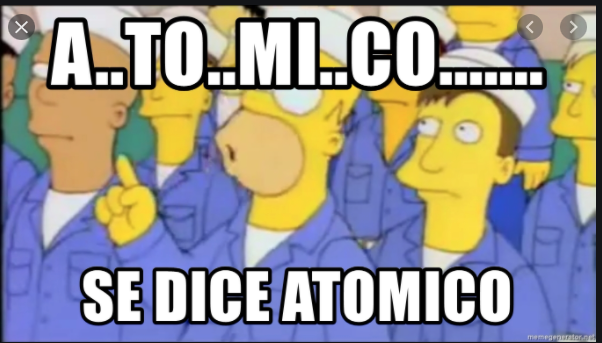


### Que onda cuando los headers son valores y no nombres de variables

In [1]:
import pandas as pd

### Pivot

In [2]:
## Ejemplo de Formato Wider a Formato Long
## Creamos una datasetsito chiquitin

d = {'pais': ['Colombia', 'México', 'Salvador'], '1999': [745, 37737, 212258], '2000': [2666, 80488, 213766]}
df = pd.DataFrame(data=d)
df

,pais,1999,2000
0,Colombia,745,2666
1,México,37737,80488
2,Salvador,212258,213766


In [3]:
## x.x! tiene como columnas los que parecieran ser añooos???
tidy_df = df.melt(id_vars=["pais"], var_name=["year"], value_name="casos")
print(tidy_df)

#Pandas.melt() unpivots a DataFrame from wide format to long format.

       pais  year   casos
0  Colombia  1999     745
1    México  1999   37737
2  Salvador  1999  212258
3  Colombia  2000    2666
4    México  2000   80488
5  Salvador  2000  213766


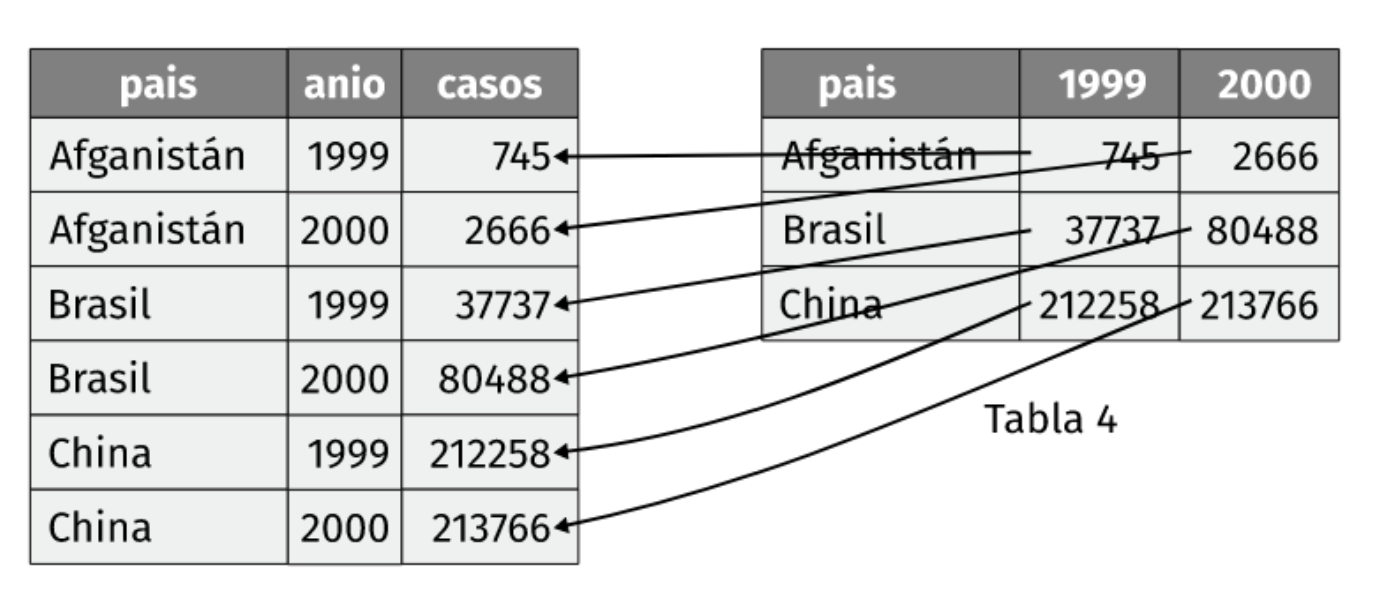

In [18]:
# Otro Ejemplo
df_relinc=pd.read_csv("data/religion_income.csv")
df_relinc.head()

,religion,<10k,10-20k,20-30k,30-40k,40-50k,50-75k,75-100k,100-150k,>150k,refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,refused,15,14,15,11,10,35,21,17,18,116


In [5]:
religion_melted = df_relinc.melt(id_vars=["religion"], var_name=["income"], value_name="frecuency")
religion_melted.head()

,religion,income,frecuency
0,Agnostic,<10k,27
1,Atheist,<10k,12
2,Buddhist,<10k,27
3,Catholic,<10k,418
4,refused,<10k,15


In [15]:
# Se perdieron datos? porque solo nos muestra los <10k y no todos los rangos UnU

In [19]:
## Ejemplo de Formato Long a Formato Wider

wider_to_long = pd.read_csv('data/wider.csv')
wider_to_long
wider_to_long = wider_to_long.drop(columns="Unnamed: 0")
wider_to_long

,pais,anio,tipo,cuenta
0,Afganistán,1999,casos,745
1,Afganistán,1999,población,19987071
2,Afganistán,2000,casos,2666
3,Afganistán,2000,población,20595360
4,Brasil,1999,casos,37737
5,Brasil,1999,población,172006362
6,Brasil,2000,casos,80488
7,Brasil,2000,población,174504898
8,China,1999,casos,212258
9,China,1999,población,1272915272


Wanted: 
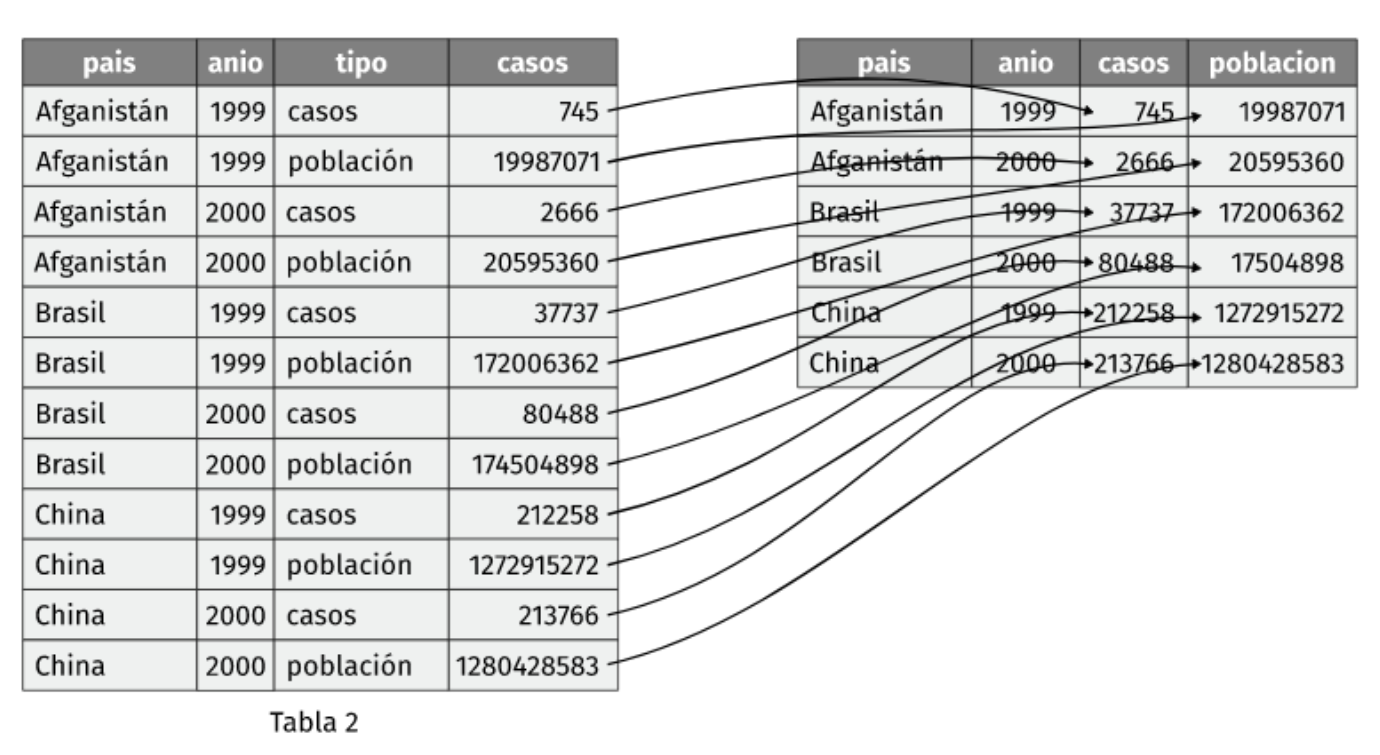

In [7]:
## Pasmos a Formato Wider

wider_to_long.pivot_table(index=['pais', 'anio'], columns='tipo', values='cuenta').reset_index().rename_axis(None, axis = 1)

,pais,anio,casos,población
0,Afganistán,1999,745,19987071
1,Afganistán,2000,2666,20595360
2,Brasil,1999,37737,172006362
3,Brasil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


### Separate

In [20]:
## Separar columnas
# Wamo a ver
separate = pd.read_csv('data/separate.csv')
separate

,pais,anio,tasa
0,Afganistán,1999,745/19987071
1,Afganistán,2000,2666/20595360
2,Brasil,1999,37737/172006362
3,Brasil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


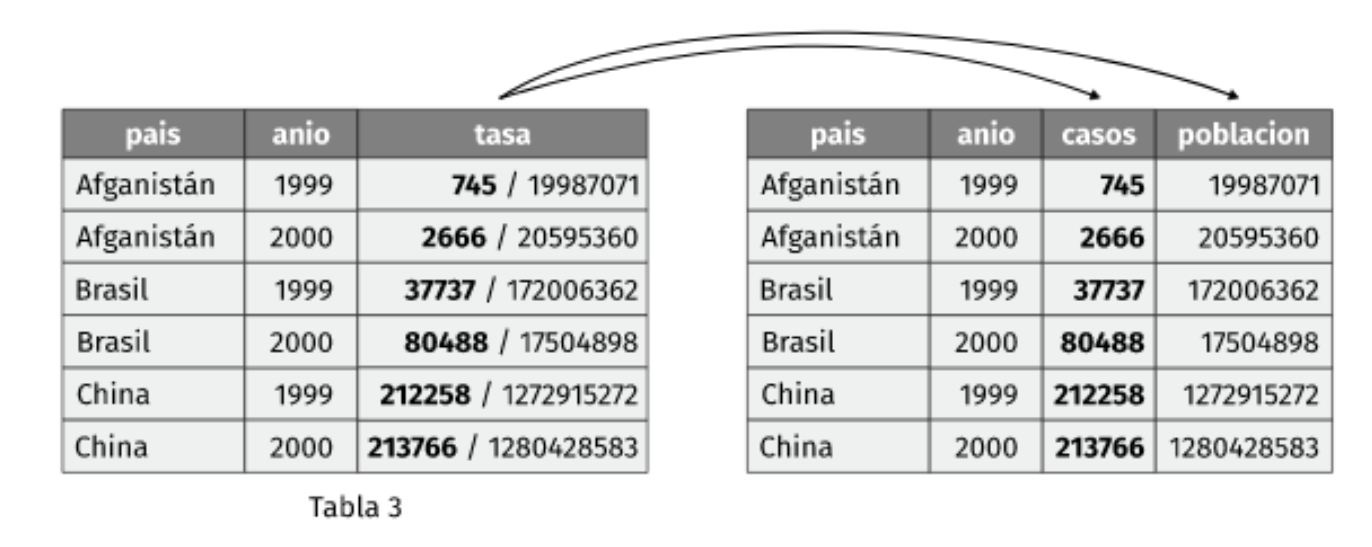

In [9]:
cleaned = separate.tasa.str.split('/', expand=True)
cleaned.columns = ['casos','poblacion']
cleaned

,casos,poblacion
0,745,19987071
1,2666,20595360
2,37737,172006362
3,80488,174504898
4,212258,1272915272
5,213766,1280428583


In [10]:
separate

,pais,anio,tasa
0,Afganistán,1999,745/19987071
1,Afganistán,2000,2666/20595360
2,Brasil,1999,37737/172006362
3,Brasil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [11]:
separate = separate.drop(columns="tasa")

In [12]:
pd.concat([separate, cleaned], axis=1)

,pais,anio,casos,poblacion
0,Afganistán,1999,745,19987071
1,Afganistán,2000,2666,20595360
2,Brasil,1999,37737,172006362
3,Brasil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [13]:
separate

,pais,anio
0,Afganistán,1999
1,Afganistán,2000
2,Brasil,1999
3,Brasil,2000
4,China,1999
5,China,2000


In [15]:
separate.dtypes

pais    object
anio     int64
dtype: object

### Unite

In [16]:
## Unir nuestras columnas

fusion = pd.read_csv('unite.csv', dtype = {'anio': 'str'})
fusion

,pais,siglo,anio,tasa
0,Afganistán,19,99,745/19987071
1,Afganistán,20,00,2666/20595360
2,Brasil,19,99,37737/172006362
3,Brasil,20,00,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,00,213766/1280428583


In [17]:
fusion['anio_completo'] = fusion['siglo'].astype(str) + fusion['anio']
fusion

,pais,siglo,anio,tasa,anio_completo
0,Afganistán,19,99,745/19987071,1999
1,Afganistán,20,00,2666/20595360,2000
2,Brasil,19,99,37737/172006362,1999
3,Brasil,20,00,80488/174504898,2000
4,China,19,99,212258/1272915272,1999
5,China,20,00,213766/1280428583,2000
